## Table of Contents
* [1. Importing Libraries](#1.-Importing-Libraries)
* [2. Importing Data](#2.-Importing-Data)
* [3. Exploring Data](#3.-Exploring-Data)
* [4. The Elbow Technique](#4.-The-Elbow-Technique)
* [5. K-Means Clustering](#5.-K-Means-Clustering)
* [6. Exploring GDP Grouping](#6.-Exploring-GDP-Grouping)
* [7. Exporting Data](#7.-Exporting-Data)

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

## 2. Importing Data

In [3]:
# Define path

path = r'C:\Users\vaiva\OneDrive\Documents\CareerFoundry\Achievement 6 SDG'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','sdg_clean.csv'))

## 3. Exploring Data

In [5]:
df.shape

(3818, 21)

In [6]:
df.head()

,Unnamed: 0,country,year,sdg_index,no_poverty,zero_hunger,good_health,quality_education,gender_equality,clean_water,...,economic_growth,infrastructure_innovation,reduced_inequalities,sustainable_cities,responsible_consumption,climate_action,underwater_life,land_life,peace_justice,partnerships
0,0,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2
1,1,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2
2,2,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,...,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2
3,3,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,...,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2
4,4,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,...,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2


In [7]:
# Dropping the 'Unnamed: 0' index column

df = df.drop('Unnamed: 0', axis=1)

## 4. The Elbow Technique

In [8]:
df.dtypes

country                       object
year                           int64
sdg_index                    float64
no_poverty                   float64
zero_hunger                  float64
good_health                  float64
quality_education            float64
gender_equality              float64
clean_water                  float64
affordable_energy            float64
economic_growth              float64
infrastructure_innovation    float64
reduced_inequalities         float64
sustainable_cities           float64
responsible_consumption      float64
climate_action               float64
underwater_life              float64
land_life                    float64
peace_justice                float64
partnerships                 float64
dtype: object

In [9]:
# creating a new df without the categorical columns

df_1 = df.drop('country', axis = 1)

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df_1).score(df_1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\vaiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vaiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
C:\Users\vaiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vaiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

[-31442690.816867467,
 -19948530.34013226,
 -16020354.298983991,
 -13665070.166753668,
 -12382376.56583621,
 -11078149.166291587,
 -10216226.348256912,
 -9751021.060916055,
 -9347929.242285622]

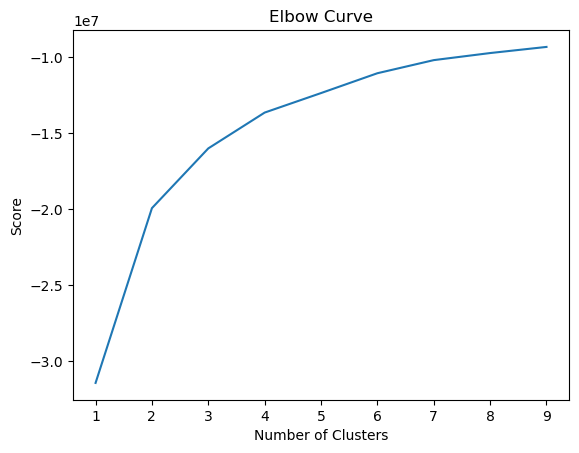

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### It seems the curve starts to flatten out at around 3 clusters

## 5. K-Means Clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df_1)

C:\Users\vaiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vaiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
df_1['clusters'] = kmeans.fit_predict(df_1)

C:\Users\vaiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vaiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


In [16]:
df_1.head()

,year,sdg_index,no_poverty,zero_hunger,good_health,quality_education,gender_equality,clean_water,affordable_energy,economic_growth,infrastructure_innovation,reduced_inequalities,sustainable_cities,responsible_consumption,climate_action,underwater_life,land_life,peace_justice,partnerships,clusters
0,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,21.0,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2,1
1,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,22.3,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2,1
2,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,21.5,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2,1
3,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,24.5,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2,1
4,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,28.0,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2,1


In [17]:
df_1['clusters'].value_counts()

0    1592
1    1150
2    1076
Name: clusters, dtype: int64

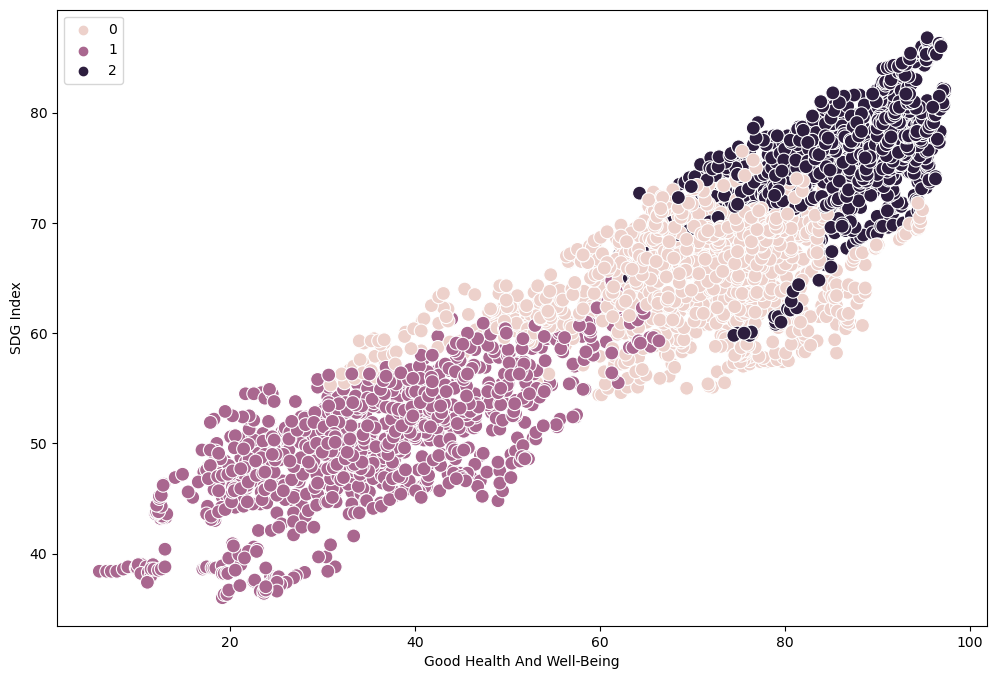

In [18]:
# Plot the clusters for the "SDG Index" and "good_health" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['good_health'], y=df_1['sdg_index'], hue=kmeans.labels_, s=100) 
# Here, I'm subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Good Health And Well-Being') # Label x-axis.
plt.ylabel('SDG Index') # Label y-axis.
plt.show()

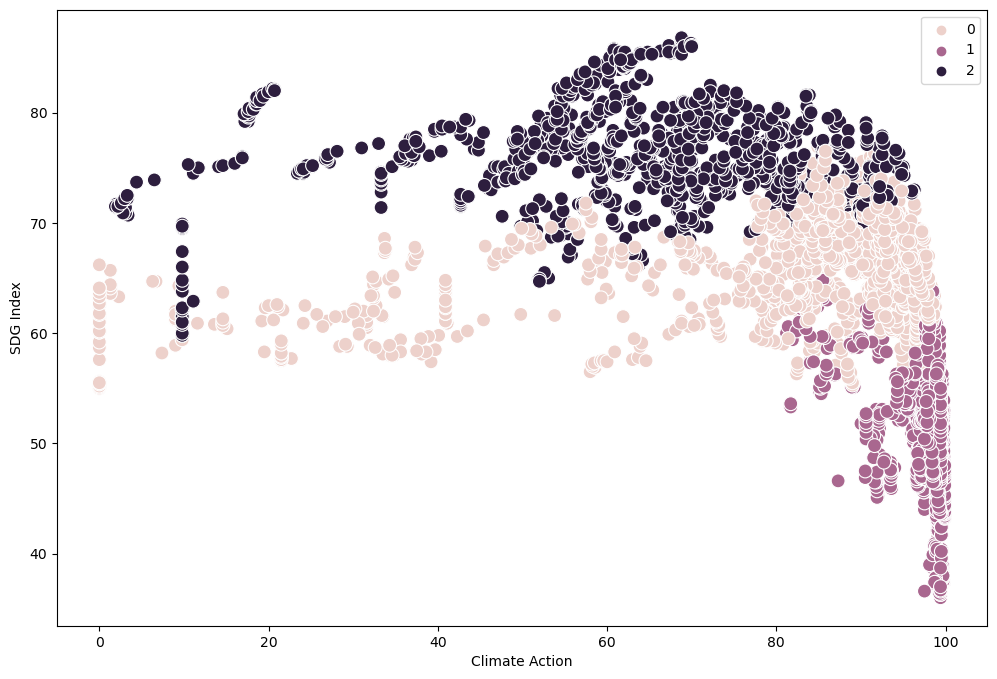

In [19]:
# Plot the clusters for the "Climate Action" and "SDG Index" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['climate_action'], y=df_1['sdg_index'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Climate Action') 
plt.ylabel('SDG Index') 
plt.show()

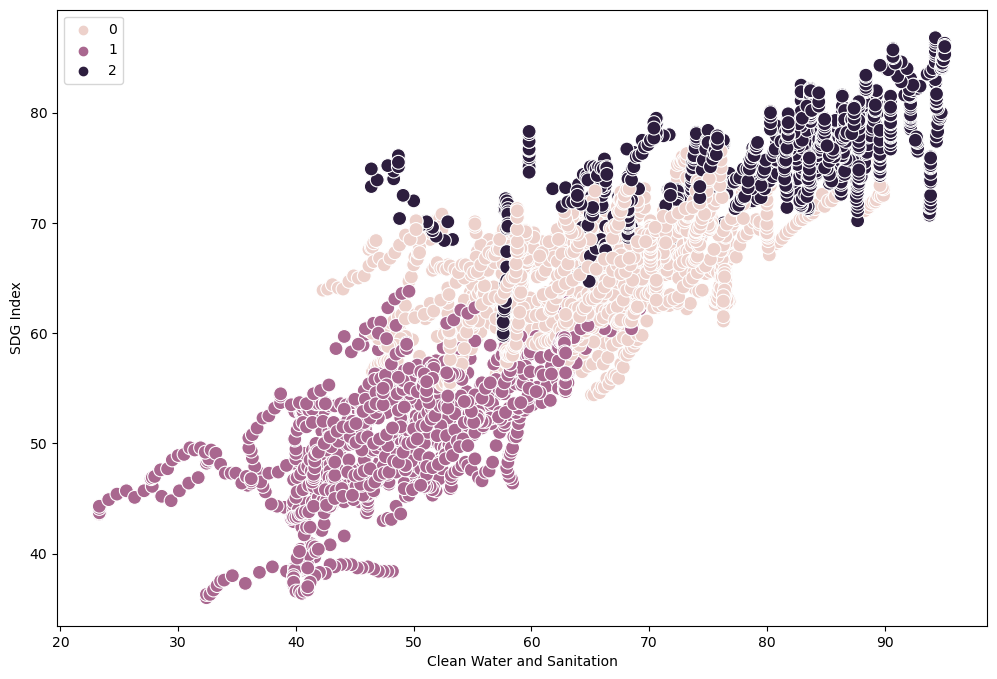

In [20]:
# Plot the clusters for the "Clean Water" and "SDG Index" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['clean_water'], y=df_1['sdg_index'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Clean Water and Sanitation') 
plt.ylabel('SDG Index') 
plt.show()

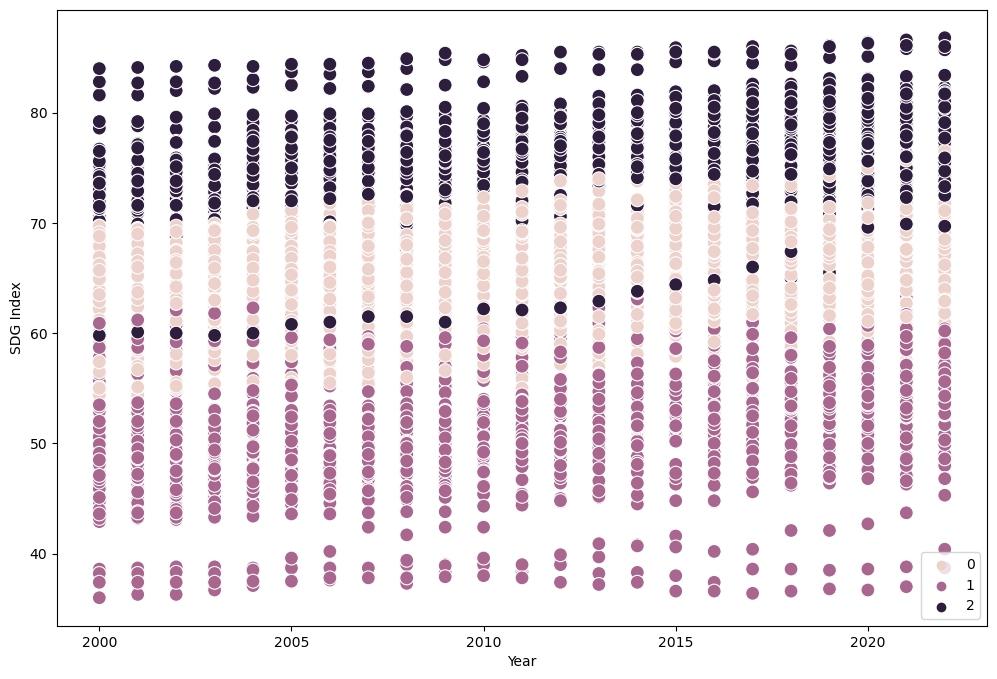

In [21]:
# Plot the clusters for the "Year" and "SDG Index" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['year'], y=df_1['sdg_index'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year') 
plt.ylabel('SDG Index') 
plt.show()

In [22]:
df_1.loc[df_1['clusters'] == 2, 'cluster'] = 'dark purple'
df_1.loc[df_1['clusters'] == 1, 'cluster'] = 'purple'
df_1.loc[df_1['clusters'] == 0, 'cluster'] = 'pink'

In [23]:
df_1.columns

Index(['year', 'sdg_index', 'no_poverty', 'zero_hunger', 'good_health',
       'quality_education', 'gender_equality', 'clean_water',
       'affordable_energy', 'economic_growth', 'infrastructure_innovation',
       'reduced_inequalities', 'sustainable_cities', 'responsible_consumption',
       'climate_action', 'underwater_life', 'land_life', 'peace_justice',
       'partnerships', 'clusters', 'cluster'],
      dtype='object')

In [24]:
pd.set_option('display.max_columns', None)

In [25]:
# Grouping clusters

df_1.groupby('cluster').agg({'sdg_index':['mean', 'median'], 
                         'no_poverty':['mean', 'median'], 
                         'zero_hunger':['mean', 'median'],
                          'good_health':['mean', 'median'],
                          'quality_education':['mean', 'median'],
                        'gender_equality':['mean', 'median'],
                             'clean_water':['mean', 'median'],
                             'affordable_energy':['mean', 'median'],
                             'economic_growth':['mean', 'median'],
                             'infrastructure_innovation':['mean', 'median'],
                             'reduced_inequalities':['mean', 'median'],
                             'sustainable_cities':['mean', 'median'],
                             'responsible_consumption':['mean', 'median'],
                             'climate_action':['mean', 'median'],
                             'underwater_life':['mean', 'median'],
                             'land_life':['mean', 'median'],
                             'peace_justice':['mean', 'median'],
                             'partnerships':['mean', 'median'],
                            })

sdg_index        no_poverty        zero_hunger         \
                  mean median       mean median        mean median   
cluster                                                              
dark purple  75.878160   75.8  96.873234   99.4   65.057435  65.20   
pink         65.470038   65.9  69.631344   83.2   59.303329  59.30   
purple       50.354087   50.8  28.086522   27.0   48.592783  51.15   

            good_health        quality_education        gender_equality  \
                   mean median              mean median            mean   
cluster                                                                   
dark purple   86.373606   88.2         94.591543  96.25       69.844703   
pink          70.279020   72.4         81.145666  82.95       57.223807   
purple        35.390348   34.9         38.446435  40.90       41.187217   

                   clean_water        affordable_energy         \
            median        mean median              mean median   
cluster                                                          
dark purple   70.9   80.024164   83.0         75.322026   73.4   
pink          58.4   65.670729   66.8         65.559296   66.7   
purple        40.2   48.433652   48.4         30.046435   29.5   

            economic_growth        infrastructure_innovation         \
                       mean median                      mean median   
cluster                                                               
dark purple       79.433643  81.70                 68.034201   72.7   
pink              69.570038  70.00                 33.053266   29.6   
purple            61.232609  62.65                 13.307652   12.5   

            reduced_inequalities        sustainable_cities         \
                            mean median               mean median   
cluster                                                             
dark purple            84.281691   85.1          85.784294  86.70   
pink                   35.714322   28.6          75.156156  76.20   
purple                 46.900870   47.1          48.795652  47.85   

            responsible_consumption        climate_action         \
                               mean median           mean median   
cluster                                                            
dark purple               60.406599   58.6      63.915799  67.50   
pink                      80.797550   83.5      81.869095  90.25   
purple                    94.800522   95.6      97.486000  98.70   

            underwater_life         land_life        peace_justice         \
                       mean median       mean median          mean median   
cluster                                                                     
dark purple       49.755390   59.1  72.860037  73.60     77.657993  78.25   
pink              51.459171   59.5  60.948053  61.00     62.076193  61.20   
purple            40.924783   57.2  63.601826  65.75     49.193478  48.00   

            partnerships         
                    mean median  
cluster                          
dark purple    62.053625   61.8  
pink           57.626884   58.5  
purple         46.701130   45.3

In [26]:
# Bottom countries by Reduced Inequalities score

df.groupby('country')['reduced_inequalities'].mean().reset_index().sort_values(by='reduced_inequalities', ascending=True)[:5]

,country,reduced_inequalities
0,Afghanistan,0.0
78,Kuwait,0.0
36,Cuba,0.0
111,Oman,0.0
60,Guyana,0.0


### Cluster Analysis

**Dark Purple**: countries falling into this category essentially have: lower SDG Indexes (at around 50) and all other Goal scores are lower than other clusters except for Responsible Consumption and Production, Climate Action, Life of Land.<br>

Responsible Consumption and Production Goal includes indicators like production and consumption of biomass, fossil fuels, metal ores, and non-metallic minerals; food waste; hazardous waste; recycling; reporting and educating the public; renewable energy. These indicators are related to other Goals (like education, infrastructure and no poverty scores, etc), on which this cluster has low score means, makes it logical that this particular Goal is not progressing fast enough. <br>

Climate Action Goal includes indicators, like deaths and injuries from natural disasters, national and local disaster risk management strategies, integration of climate change into national policies, total greenhouse gas emissions per year, education on climate change, which also relates to Goals (like education, infrastructure, Peace, justice and strong institutions), on which this cluster is low in scores. The high score in this case could be explained that this Goal also includes indicators specifically for supporting underdeveloped countries, which means that all UN countries have a lot of initiatives helping them out, therefore the progress of this Goal has transferred to them, with funding coming from various organizations. Given the low infrastructure score, their greenhouse gas emissions are probably low which also improves the score.

Life On Land includes indicators to Sustainably manage forests, combat desertification, halt and reverse land degradation, halt biodiversity loss and poaching. While this cluster is slightly higher on this score than the second one, the difference among all clusters in terms of this score is not signifficant.

**Pink**: countries falling into this category are the middle part, lying in between on almost all Goal scores, except Reduced Inequalities, Life Under Water and Life on Land. They do have quite a low progress score on Infrastructure.

Reduced Inequalities indicators include reduced income inequalities, promoting universal social, economic and political inclusion, eliminating discriminatory practices, improving fiscal and inequality policies, regulating financial markets, improving the voting rights for developing countries, migration policies, and so on. This cluster is lower than other clusters in terms of the score for this Goal.

Life Under Water Goals includes indicators about conserving and sustainably using the oceans, seas and marine resources, reducing marine polusion, overfishing. This Cluster has the highest score for this Goal. It's important to note, that countries without the access to water are not participating in any of the indicator data collection, which might skew the bigger picture and doesn't mean that they are stalling on progressing, but rather not participating in it.

This cluster has the lowest Life On Land score. We would need to do a geographical analysis, but most likely the countries within this cluster have big territories that are used for farming, which leads to deforestation and stalling progress on this Goal.

**Purple**: countries falling into this category have the highest SDG Index. probably best categorized as first-world countries. As opposed to the first cluster, this cluster has the lowest Sustainable Consumption and Production and Climate Action scores. Given the fact that these countries have the most developed infrastructure we can deduce that they in turn produce the most greenhouse gasses, food waste, hazardous waste and so on.  

**My hypothesis is that GDP is an important indicator for the above clusters**


In [27]:
# Exporting cluster df_1 data

df_1.to_csv(os.path.join(path, '02 Data','Prepared Data', 'clusters_df.csv'))

## 6. Exploring GDP Grouping

My assumption is that the three clusters created with K-Means Clustering are countries based on their financial standing. I'd like to include a yearly GDP per capita data into the analysis to prove my hypothesis and explain the clusters.

In [28]:
# Import data

gdp = pd.read_csv(os.path.join(path, '02 Data', 'Original Data','gdp.csv'))

In [29]:
gdp.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,..,..,183.5327752,200.4623759,221.6576621,255.0551071,274.0006557,375.0782615,387.8492881,443.8451505,554.5947346,621.9124138,663.1410528,651.9878619,628.1468039,592.4761648,520.2519549,530.1498626,502.0570992,500.5229808,516.8667974,363.6740871,..
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,1126.68334,1281.659826,1425.124219,1846.120121,2373.581292,2673.787803,2972.743618,3595.038302,4370.539711,4114.134041,4094.349699,4437.141146,4247.631356,4413.063397,4578.633208,3952.803584,4124.05539,4531.032207,5287.660817,5396.214227,5343.037704,6377.203096,6802.804519
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,1780.376071,1754.582365,1794.811114,2117.048229,2624.795232,3131.328176,3500.13461,3971.803488,4946.564017,3898.478806,4495.921455,5473.281801,5610.733306,5519.777576,5516.229463,4197.419971,3967.20066,4134.936099,4171.795309,4021.983608,3354.157303,3700.311195,4273.922183
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,..,..,8800.72881,9043.682367,8832.818519,8733.014287,8673.927195,9187.166344,10019.50225,12191.59773,10446.86321,10495.30473,11920.06109,12038.87159,12313.99736,13101.54182,13300.82461,12372.88478,13195.9359,13672.57666,15501.52634,15743.31076,..
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,21620.46849,22809.08776,24784.96379,31954.15566,37630.76426,39583.93119,43084.29291,50562.86121,53721.41133,49750.69367,48237.89117,51428.19695,44902.38077,44747.75386,45680.53499,38885.53032,39931.21698,40632.23155,42904.82846,41328.6005,37207.222,42072.3411,41992.79336


In [30]:
gdp.shape

(217, 27)

### Cleaning

In [31]:
# Removing columns Series Name, Series Code, Country Code

gdp = gdp.drop(['Series Name', 'Series Code', 'Country Code'], axis=1)

In [32]:
gdp.head()

,Country Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,..,..,183.5327752,200.4623759,221.6576621,255.0551071,274.0006557,375.0782615,387.8492881,443.8451505,554.5947346,621.9124138,663.1410528,651.9878619,628.1468039,592.4761648,520.2519549,530.1498626,502.0570992,500.5229808,516.8667974,363.6740871,..
1,Albania,1126.68334,1281.659826,1425.124219,1846.120121,2373.581292,2673.787803,2972.743618,3595.038302,4370.539711,4114.134041,4094.349699,4437.141146,4247.631356,4413.063397,4578.633208,3952.803584,4124.05539,4531.032207,5287.660817,5396.214227,5343.037704,6377.203096,6802.804519
2,Algeria,1780.376071,1754.582365,1794.811114,2117.048229,2624.795232,3131.328176,3500.13461,3971.803488,4946.564017,3898.478806,4495.921455,5473.281801,5610.733306,5519.777576,5516.229463,4197.419971,3967.20066,4134.936099,4171.795309,4021.983608,3354.157303,3700.311195,4273.922183
3,American Samoa,..,..,8800.72881,9043.682367,8832.818519,8733.014287,8673.927195,9187.166344,10019.50225,12191.59773,10446.86321,10495.30473,11920.06109,12038.87159,12313.99736,13101.54182,13300.82461,12372.88478,13195.9359,13672.57666,15501.52634,15743.31076,..
4,Andorra,21620.46849,22809.08776,24784.96379,31954.15566,37630.76426,39583.93119,43084.29291,50562.86121,53721.41133,49750.69367,48237.89117,51428.19695,44902.38077,44747.75386,45680.53499,38885.53032,39931.21698,40632.23155,42904.82846,41328.6005,37207.222,42072.3411,41992.79336


In [33]:
# Renaming columns

# Renaming columns to be able to distinguish among goals with keywords

gdp.rename(columns = {'Country Name' : 'country'}, inplace = True)
gdp.rename(columns = {'2000 [YR2000]' : '2000'}, inplace = True)
gdp.rename(columns = {'2001 [YR2001]' : '2001'}, inplace = True)
gdp.rename(columns = {'2002 [YR2002]' : '2002'}, inplace = True)
gdp.rename(columns = {'2003 [YR2003]' : '2003'}, inplace = True)
gdp.rename(columns = {'2004 [YR2004]' : '2004'}, inplace = True)
gdp.rename(columns = {'2005 [YR2005]' : '2005'}, inplace = True)
gdp.rename(columns = {'2006 [YR2006]' : '2006'}, inplace = True)
gdp.rename(columns = {'2007 [YR2007]' : '2007'}, inplace = True)
gdp.rename(columns = {'2008 [YR2008]' : '2008'}, inplace = True)
gdp.rename(columns = {'2009 [YR2009]' : '2009'}, inplace = True)
gdp.rename(columns = {'2010 [YR2010]' : '2010'}, inplace = True)
gdp.rename(columns = {'2011 [YR2011]' : '2011'}, inplace = True)
gdp.rename(columns = {'2012 [YR2012]' : '2012'}, inplace = True)
gdp.rename(columns = {'2013 [YR2013]' : '2013'}, inplace = True)
gdp.rename(columns = {'2014 [YR2014]' : '2014'}, inplace = True)
gdp.rename(columns = {'2015 [YR2015]' : '2015'}, inplace = True)
gdp.rename(columns = {'2016 [YR2016]' : '2016'}, inplace = True)
gdp.rename(columns = {'2017 [YR2017]' : '2017'}, inplace = True)
gdp.rename(columns = {'2018 [YR2018]' : '2018'}, inplace = True)
gdp.rename(columns = {'2019 [YR2019]' : '2019'}, inplace = True)
gdp.rename(columns = {'2020 [YR2020]' : '2020'}, inplace = True)
gdp.rename(columns = {'2021 [YR2021]' : '2021'}, inplace = True)
gdp.rename(columns = {'2022 [YR2022]' : '2022'}, inplace = True)


In [34]:
gdp.head()

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,..,..,183.5327752,200.4623759,221.6576621,255.0551071,274.0006557,375.0782615,387.8492881,443.8451505,554.5947346,621.9124138,663.1410528,651.9878619,628.1468039,592.4761648,520.2519549,530.1498626,502.0570992,500.5229808,516.8667974,363.6740871,..
1,Albania,1126.68334,1281.659826,1425.124219,1846.120121,2373.581292,2673.787803,2972.743618,3595.038302,4370.539711,4114.134041,4094.349699,4437.141146,4247.631356,4413.063397,4578.633208,3952.803584,4124.05539,4531.032207,5287.660817,5396.214227,5343.037704,6377.203096,6802.804519
2,Algeria,1780.376071,1754.582365,1794.811114,2117.048229,2624.795232,3131.328176,3500.13461,3971.803488,4946.564017,3898.478806,4495.921455,5473.281801,5610.733306,5519.777576,5516.229463,4197.419971,3967.20066,4134.936099,4171.795309,4021.983608,3354.157303,3700.311195,4273.922183
3,American Samoa,..,..,8800.72881,9043.682367,8832.818519,8733.014287,8673.927195,9187.166344,10019.50225,12191.59773,10446.86321,10495.30473,11920.06109,12038.87159,12313.99736,13101.54182,13300.82461,12372.88478,13195.9359,13672.57666,15501.52634,15743.31076,..
4,Andorra,21620.46849,22809.08776,24784.96379,31954.15566,37630.76426,39583.93119,43084.29291,50562.86121,53721.41133,49750.69367,48237.89117,51428.19695,44902.38077,44747.75386,45680.53499,38885.53032,39931.21698,40632.23155,42904.82846,41328.6005,37207.222,42072.3411,41992.79336


In [35]:
# Transforming the gdp dataframe to have 3 columns: country, year and gdp using melt from pandas

# Melt the dataframe
melted_gdp = pd.melt(gdp, id_vars=['country'], var_name='year', value_name='gdp')

# Reset the index
melted_gdp.reset_index(drop=True, inplace=True)

# Display the resulting dataframe
print(melted_gdp)

                    country  year          gdp
0               Afghanistan  2000           ..
1                   Albania  2000   1126.68334
2                   Algeria  2000  1780.376071
3            American Samoa  2000           ..
4                   Andorra  2000  21620.46849
...                     ...   ...          ...
4986  Virgin Islands (U.S.)  2022           ..
4987     West Bank and Gaza  2022  3789.327966
4988            Yemen, Rep.  2022           ..
4989                 Zambia  2022  1487.907764
4990               Zimbabwe  2022  1266.996031

[4991 rows x 3 columns]


In [36]:
melted_gdp.head()

,country,year,gdp
0,Afghanistan,2000,..
1,Albania,2000,1126.68334
2,Algeria,2000,1780.376071
3,American Samoa,2000,..
4,Andorra,2000,21620.46849


In [37]:
# Checking mixed data types in melted_gdp

for col in melted_gdp.columns.tolist():
      weird = (melted_gdp[[col]].applymap(type) != melted_gdp[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (melted_gdp[weird]) > 0:
        print (col)

#### No mixed data types

In [38]:
melted_gdp.dtypes

country    object
year       object
gdp        object
dtype: object

In [39]:
# Change the data type of the 'gdp' column to continuous (numeric)

melted_gdp['gdp'] = pd.to_numeric(melted_gdp['gdp'], errors='coerce')

In [40]:
melted_gdp.dtypes

country     object
year        object
gdp        float64
dtype: object

In [41]:
# Change the data type of the 'year' column to integer to match the df

melted_gdp['year'] = melted_gdp['year'].astype('int64')

In [42]:
melted_gdp.dtypes

country     object
year         int64
gdp        float64
dtype: object

In [43]:
df.dtypes

country                       object
year                           int64
sdg_index                    float64
no_poverty                   float64
zero_hunger                  float64
good_health                  float64
quality_education            float64
gender_equality              float64
clean_water                  float64
affordable_energy            float64
economic_growth              float64
infrastructure_innovation    float64
reduced_inequalities         float64
sustainable_cities           float64
responsible_consumption      float64
climate_action               float64
underwater_life              float64
land_life                    float64
peace_justice                float64
partnerships                 float64
dtype: object

#### Data types match

In [44]:
# Finding duplicates in the melted_gdp

gdp_dups = melted_gdp[melted_gdp.duplicated()]

In [45]:
gdp_dups

,country,year,gdp


#### No duplicates

In [46]:
# Checking for missing values in df

melted_gdp.isna().sum()

country      0
year         0
gdp        237
dtype: int64

In [47]:
pd.set_option('display.max_rows', None)

In [48]:
gdp_nan = melted_gdp.loc[melted_gdp['gdp'].isna()]

In [49]:
gdp_nan.groupby(['country', 'year']).sum()

gdp
country                   year     
Afghanistan               2000  0.0
                          2001  0.0
                          2022  0.0
American Samoa            2000  0.0
                          2001  0.0
                          2022  0.0
Aruba                     2022  0.0
Bhutan                    2022  0.0
British Virgin Islands    2000  0.0
                          2001  0.0
                          2002  0.0
                          2003  0.0
                          2004  0.0
                          2005  0.0
                          2006  0.0
                          2007  0.0
                          2008  0.0
                          2009  0.0
                          2010  0.0
                          2011  0.0
                          2012  0.0
                          2013  0.0
                          2014  0.0
                          2015  0.0
                          2016  0.0
                          2017  0.0
                          2018  0.0
                          2019  0.0
                          2020  0.0
                          2021  0.0
                          2022  0.0
Cayman Islands            2000  0.0
                          2001  0.0
                          2002  0.0
                          2003  0.0
                          2004  0.0
                          2005  0.0
                          2022  0.0
Channel Islands           2008  0.0
                          2009  0.0
                          2010  0.0
                          2011  0.0
                          2012  0.0
                          2013  0.0
                          2014  0.0
                          2015  0.0
                          2022  0.0
Cuba                      2021  0.0
                          2022  0.0
Curacao                   2000  0.0
                          2001  0.0
                          2002  0.0
                          2003  0.0
                          2004  0.0
                          2005  0.0
                          2006  0.0
                          2007  0.0
                          2008  0.0
                          2009  0.0
                          2010  0.0
                          2022  0.0
Eritrea                   2012  0.0
                          2013  0.0
                          2014  0.0
                          2015  0.0
                          2016  0.0
                          2017  0.0
                          2018  0.0
                          2019  0.0
                          2020  0.0
                          2021  0.0
                          2022  0.0
Faroe Islands             2022  0.0
French Polynesia          2022  0.0
Gibraltar                 2000  0.0
                          2001  0.0
                          2002  0.0
                          2003  0.0
                          2004  0.0
                          2005  0.0
                          2006  0.0
                          2007  0.0
                          2008  0.0
                          2009  0.0
                          2010  0.0
                          2011  0.0
                          2012  0.0
                          2013  0.0
                          2014  0.0
                          2015  0.0
                          2016  0.0
                          2017  0.0
                          2018  0.0
                          2019  0.0
                          2020  0.0
                          2021  0.0
                          2022  0.0
Greenland                 2022  0.0
Guam                      2000  0.0
                          2001  0.0
                          2022  0.0
Isle of Man               2021  0.0
                          2022  0.0
Korea, Dem. People's Rep. 2000  0.0
                          2001  0.0
                          2002  0.0
                          2003  0.0
                          2004  0.0
                          2005  0.0
                          2006  0.0


#### For now leaving the missing values. I will merge first, and then deal with the missing values in the final dataframe, because some of the countries might not even be in my df

In [50]:
# Extract unique country names from the df and melted_gdp

gdp_country_names = set(melted_gdp['country'])
df_country_names = set(df['country'])

# Convert sets to lists and find differences
names_in_gdp_not_in_df = list(gdp_country_names - df_country_names)
names_in_df_not_in_gdp = list(df_country_names - gdp_country_names)

# Print the mismatches
print("Country names in GDP but not in DataFrame:", names_in_gdp_not_in_df)
print()
print("Country names in DataFrame but not in GDP:", names_in_df_not_in_gdp)


Country names in GDP but not in DataFrame: ['Tuvalu', 'Samoa', 'Seychelles', 'St. Vincent and the Grenadines', 'North Macedonia', 'Korea, Rep.', 'San Marino', 'Curacao', 'Slovak Republic', 'Guinea-Bissau', 'Iran, Islamic Rep.', 'Macao SAR, China', 'Turkiye', 'Gambia, The', 'French Polynesia', 'Tonga', 'Bermuda', 'Palau', 'Syrian Arab Republic', 'Bahamas, The', "Cote d'Ivoire", 'Tanzania', 'Equatorial Guinea', 'Kyrgyz Republic', 'Congo, Dem. Rep.', 'Monaco', 'Hong Kong SAR, China', 'Turks and Caicos Islands', 'Yemen, Rep.', 'Brunei Darussalam', 'Kiribati', 'Egypt, Arab Rep.', 'Cayman Islands', 'American Samoa', 'Barbados', 'Dominica', 'Sint Maarten (Dutch part)', 'Venezuela, RB', 'Vanuatu', 'Guam', 'Eritrea', 'Congo, Rep.', 'New Caledonia', 'Puerto Rico', 'Antigua and Barbuda', 'Libya', 'Virgin Islands (U.S.)', 'Marshall Islands', 'Kosovo', 'Serbia', 'West Bank and Gaza', 'Aruba', 'Solomon Islands', 'St. Lucia', 'St. Kitts and Nevis', 'Nauru', "Korea, Dem. People's Rep.", 'Grenada', 'Li

In [51]:
# Renaming countries in the melted_gdp to match the df file

melted_gdp['country'] = melted_gdp['country'].replace({
    'Brunei Darussalam': 'Brunei',
    'Korea, Rep.': 'South Korea',
    'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
    'Yemen, Rep.': 'Yemen',
    'Syrian Arab Republic': 'Syria',
    'North Macedonia': 'Macedonia',
    'Tanzania': 'United Republic of Tanzania',
    'Lao PDR': 'Laos',
    'Bahamas, The': 'The Bahamas',
    'Russian Federation': 'Russia',
    'Egypt, Arab Rep.': 'Egypt',
    'Turkiye': 'Turkey',
    'Serbia': 'Republic of Serbia',
    'Czechia': 'Czech Republic',
    'Iran, Islamic Rep.': 'Iran',
    "Cote d'Ivoire": 'Ivory Coast',
    'Gambia, The': 'Gambia',
    'United States': 'United States of America',
    'Venezuela, RB': 'Venezuela',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Slovak Republic': 'Slovakia',
    'Congo, Rep.' : 'Republic of the Congo'
    
})


In [52]:
# One more iteration

gdp_country_names = set(melted_gdp['country'])
df_country_names = set(df['country'])

# Convert sets to lists and find differences
names_in_gdp_not_in_df = list(gdp_country_names - df_country_names)
names_in_df_not_in_gdp = list(df_country_names - gdp_country_names)

# Print the mismatches
print("Country names in GDP but not in DataFrame:", names_in_gdp_not_in_df)
print()
print("Country names in DataFrame but not in GDP:", names_in_df_not_in_gdp)


Country names in GDP but not in DataFrame: ['Tuvalu', 'Samoa', 'Seychelles', 'St. Vincent and the Grenadines', 'San Marino', 'Curacao', 'Guinea-Bissau', 'Macao SAR, China', 'French Polynesia', 'Tonga', 'Bermuda', 'Palau', 'Equatorial Guinea', 'Monaco', 'Hong Kong SAR, China', 'Turks and Caicos Islands', 'Kiribati', 'Cayman Islands', 'American Samoa', 'Barbados', 'Dominica', 'Sint Maarten (Dutch part)', 'Vanuatu', 'Guam', 'Eritrea', 'New Caledonia', 'Puerto Rico', 'Antigua and Barbuda', 'Libya', 'Virgin Islands (U.S.)', 'Marshall Islands', 'Kosovo', 'West Bank and Gaza', 'Aruba', 'Solomon Islands', 'St. Lucia', 'St. Kitts and Nevis', 'Nauru', "Korea, Dem. People's Rep.", 'Grenada', 'Liechtenstein', 'British Virgin Islands', 'Isle of Man', 'Greenland', 'St. Martin (French part)', 'Faroe Islands', 'Gibraltar', 'Micronesia, Fed. Sts.', 'Northern Mariana Islands', 'Andorra', 'Timor-Leste', 'Channel Islands']

Country names in DataFrame but not in GDP: []


### Left merge on df and melted_gdp

In [53]:
merged_df = pd.merge(df, melted_gdp, on=['country', 'year'], how='left')

In [54]:
merged_df.head()

,country,year,sdg_index,no_poverty,zero_hunger,good_health,quality_education,gender_equality,clean_water,affordable_energy,economic_growth,infrastructure_innovation,reduced_inequalities,sustainable_cities,responsible_consumption,climate_action,underwater_life,land_life,peace_justice,partnerships,gdp
0,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,21.0,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2,NaN
1,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,22.3,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2,NaN
2,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,21.5,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2,183.532775
3,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,24.5,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2,200.462376
4,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,28.0,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2,221.657662


In [55]:
merged_df.loc[merged_df['gdp'].isna()]

,country,year,sdg_index,no_poverty,zero_hunger,good_health,quality_education,gender_equality,clean_water,affordable_energy,economic_growth,infrastructure_innovation,reduced_inequalities,sustainable_cities,responsible_consumption,climate_action,underwater_life,land_life,peace_justice,partnerships,gdp
0,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,21.0,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2,NaN
1,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,22.3,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2,NaN
22,Afghanistan,2022,49.0,12.4,46.9,37.5,34.4,32.9,50.4,35.9,39.5,9.7,0.0,24.5,96.7,99.0,0.0,73.2,44.8,45.3,NaN
413,Bhutan,2022,72.3,94.8,57.9,73.5,87.2,61.6,69.6,73.9,72.1,42.5,64.4,84.6,88.1,89.9,0.0,65.7,80.0,63.2,NaN
964,Cuba,2021,76.3,0.0,60.9,84.6,92.4,83.2,73.2,76.6,93.3,40.7,0.0,64.7,88.4,91.6,75.2,71.8,60.7,87.9,NaN
965,Cuba,2022,74.1,0.0,60.9,84.6,92.4,83.4,73.2,76.6,93.4,40.4,0.0,64.7,88.4,91.6,75.2,71.7,60.5,87.9,NaN
2000,Lebanon,2022,67.5,98.7,56.6,74.3,99.6,45.2,66.3,61.9,54.1,73.3,84.4,60.9,80.7,86.8,65.8,57.0,51.9,30.1,NaN
2944,Sao Tome and Principe,2000,53.5,33.7,58.4,47.9,49.1,32.2,39.6,29.8,50.8,14.2,83.7,61.5,96.4,99.2,54.1,36.1,74.4,48.0,NaN
3128,Somalia,2000,43.2,11.3,26.1,12.5,55.6,14.0,39.6,26.9,56.3,3.9,73.8,46.0,90.9,99.9,53.7,57.2,33.3,33.3,NaN
3129,Somalia,2001,43.3,11.3,26.2,12.7,55.6,14.0,39.7,26.9,56.4,3.9,73.8,46.9,91.0,99.9,53.4,57.0,33.3,33.3,NaN


In [56]:
merged_df.loc[merged_df['country'] == 'Afghanistan']

,country,year,sdg_index,no_poverty,zero_hunger,good_health,quality_education,gender_equality,clean_water,affordable_energy,economic_growth,infrastructure_innovation,reduced_inequalities,sustainable_cities,responsible_consumption,climate_action,underwater_life,land_life,peace_justice,partnerships,gdp
0,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,21.0,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2,NaN
1,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,22.3,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2,NaN
2,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,21.5,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2,183.532775
3,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,24.5,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2,200.462376
4,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,28.0,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2,221.657662
5,Afghanistan,2005,37.5,28.8,35.9,22.6,1.6,20.8,33.6,27.4,38.4,5.2,0.0,26.9,95.7,99.4,0.0,51.8,39.2,34.2,255.055107
6,Afghanistan,2006,37.6,28.8,36.5,22.7,1.6,20.8,33.9,27.5,38.5,5.2,0.0,27.3,95.9,99.3,0.0,51.8,39.2,34.7,274.000656
7,Afghanistan,2007,38.0,28.8,39.5,24.4,1.6,21.0,34.6,27.6,38.5,5.2,0.0,27.6,96.2,99.3,0.0,51.8,39.2,34.8,375.078261
8,Afghanistan,2008,37.3,28.8,37.8,25.9,1.6,21.0,35.7,14.2,38.5,5.2,0.0,28.0,96.3,99.2,0.0,51.8,39.2,36.0,387.849288
9,Afghanistan,2009,38.3,28.8,43.0,28.1,1.6,20.8,36.9,15.4,38.5,5.4,0.0,30.3,96.6,99.1,0.0,53.0,39.9,36.7,443.845150


### Imputing using ARIMA model

C:\Users\vaiva\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\vaiva\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


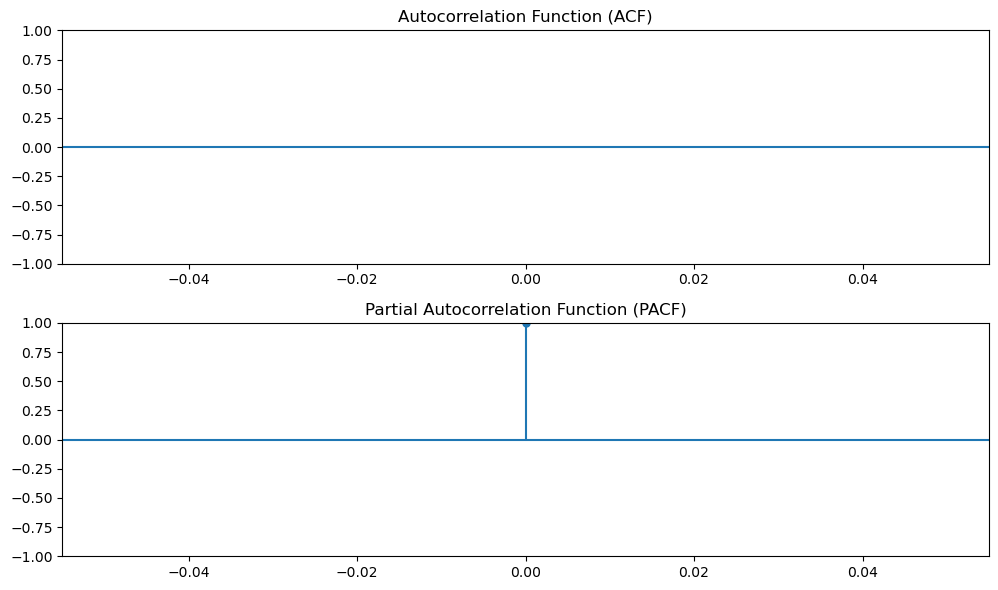

In [57]:
# Plotting ACF and PACF to determine if ARIMA is the right fit for the data

# Create a time series with 'year' as the index
time_series = merged_df.set_index('year')['gdp']

# Create subplots for ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot ACF
plot_acf(time_series, lags=40, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(time_series, lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

C:\Users\vaiva\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\vaiva\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


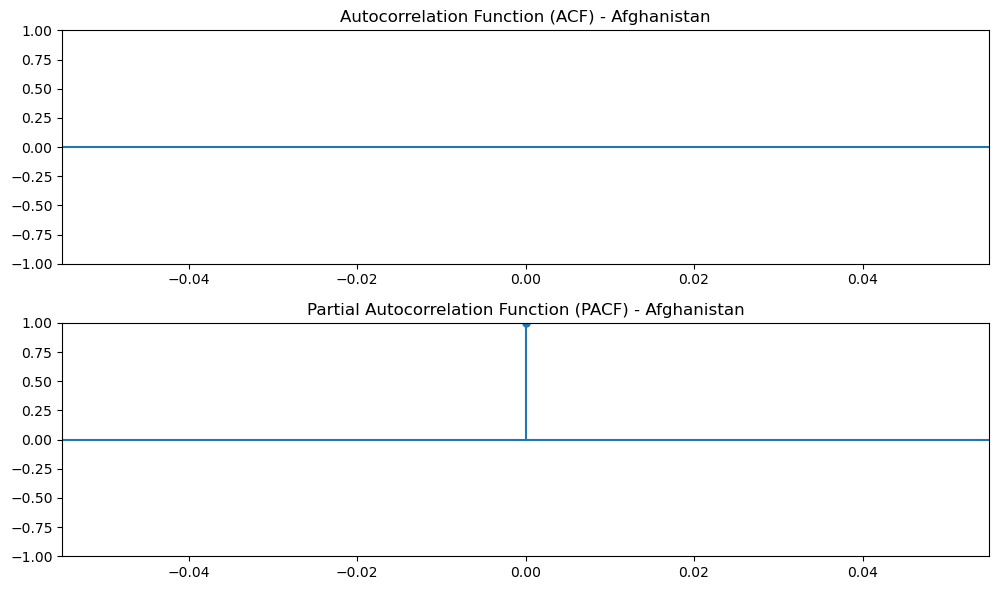

In [58]:
# Checking the same for Afghanistan

# Filter data for Afghanistan
afghanistan_data = merged_df[merged_df['country'] == 'Afghanistan']

# Create a time series with 'year' as the index
afghanistan_time_series = afghanistan_data.set_index('year')['gdp']

# Create subplots for ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot ACF
plot_acf(afghanistan_time_series, lags=10, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF) - Afghanistan')

# Plot PACF
plot_pacf(afghanistan_time_series, lags=10, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF) - Afghanistan')

plt.tight_layout()
plt.show()

#### When the ACF and PACF plots have horizontal lines at 0 for most lags, it indicates that the data may not exhibit strong autocorrelation patterns and may not require a significant autoregressive (AR) or partial autoregressive (PACF) component in an ARIMA model. 

### Imputing using a mean

After trying out ARIMA, linear interpolation and rolling average, none of these models were fitting for imputing my data. I decided to simply impute the mean for each country.

Important to note, this will bias the analysis, since imputing mean for early 2000s is not representative of that period of time. Most countries had much lower GDP then.

In [59]:
# Calculate the mean GDP for each country

merged_df['gdp'] = merged_df.groupby('country')['gdp'].transform(lambda x: x.fillna(x.mean()))

In [60]:
merged_df.loc[df['country'].isna()]

,country,year,sdg_index,no_poverty,zero_hunger,good_health,quality_education,gender_equality,clean_water,affordable_energy,economic_growth,infrastructure_innovation,reduced_inequalities,sustainable_cities,responsible_consumption,climate_action,underwater_life,land_life,peace_justice,partnerships,gdp


In [61]:
merged_df.describe()

,year,sdg_index,no_poverty,zero_hunger,good_health,quality_education,gender_equality,clean_water,affordable_energy,economic_growth,infrastructure_innovation,reduced_inequalities,sustainable_cities,responsible_consumption,climate_action,underwater_life,land_life,peace_justice,partnerships,gdp
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,2011.000000,63.850288,64.795233,57.698900,64.306207,72.073808,55.950367,64.523965,57.614013,69.838554,36.964222,52.771163,70.211498,79.268675,81.513332,47.805998,65.104453,62.587166,55.583552,12446.227476
std,6.634118,10.916160,36.836088,11.221834,22.651757,27.008855,17.621801,15.103414,21.871602,10.243085,26.079512,32.127442,18.417139,17.017656,21.895557,28.637462,13.775995,14.843730,13.277460,18607.343027
min,2000.000000,36.000000,0.000000,7.700000,5.900000,0.000000,3.500000,23.300000,0.100000,38.400000,0.000000,0.000000,13.800000,32.900000,0.000000,0.000000,26.000000,27.900000,15.100000,110.460875
25%,2005.000000,55.100000,30.825000,52.325000,44.900000,55.600000,43.100000,52.600000,41.200000,63.900000,15.400000,23.200000,56.400000,67.825000,71.700000,36.925000,55.100000,51.600000,45.900000,1239.176111
50%,2011.000000,65.400000,81.600000,58.900000,71.150000,81.200000,57.700000,64.900000,65.200000,70.100000,29.000000,57.400000,75.300000,84.500000,90.800000,58.700000,65.100000,61.700000,55.100000,4164.246221
75%,2017.000000,72.300000,98.600000,65.300000,81.700000,94.900000,69.200000,74.700000,72.100000,76.700000,52.700000,80.800000,85.075000,94.100000,97.300000,67.900000,74.300000,74.200000,65.000000,15006.404065
max,2022.000000,86.800000,100.000000,83.400000,97.300000,100.000000,94.000000,95.100000,99.600000,93.600000,99.200000,100.000000,99.900000,99.000000,99.900000,91.200000,97.900000,96.000000,100.000000,133590.147000


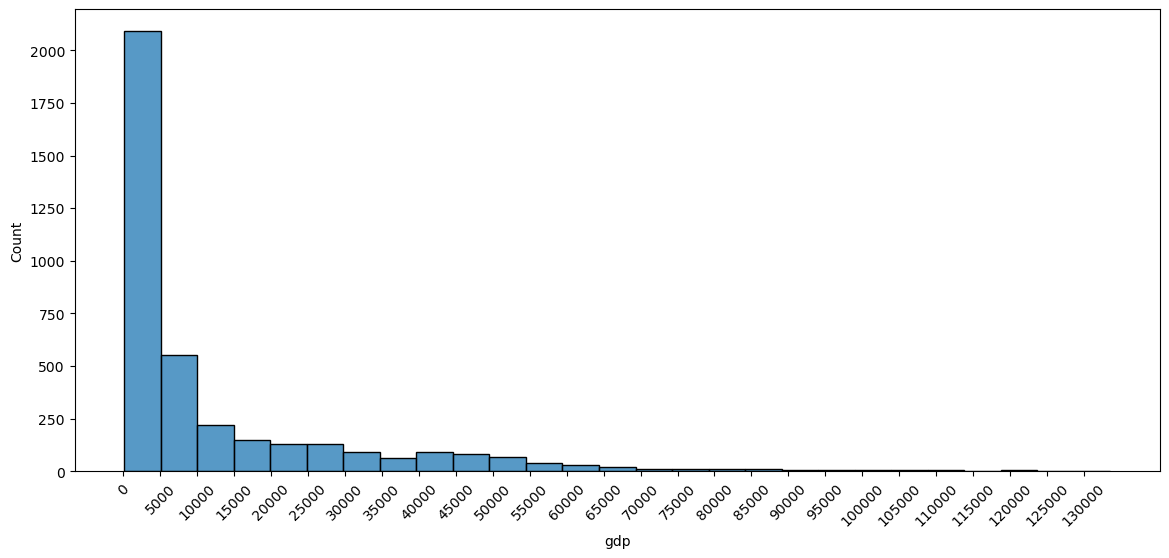

In [62]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Create a histogram using sns.histplot
sns.histplot(merged_df['gdp'], bins=27)

# Customize x-axis ticks
plt.xticks(range(0, int(merged_df['gdp'].max()) + 1, 5000))

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### The histogram shows that the majority of gdp is somewhere below 5000 USD GDP per capita. There's also a long right tail, showing that some countries have a signifficantly high GDP per capita I will create GDP categories looking at the average of GDP per country over the years.

In [63]:
# Creating different GDP Categories in a new column
# I am using the categories established by the World Bank

# Calculate the mean GDP for each country
mean_gdp_per_country = merged_df.groupby('country')['gdp'].mean()

# Create a mapping from country to mean GDP category
gdp_category_mapping = {
    country: 'Low GDP' if mean_gdp <= 1085 else 'Mid GDP' if 1086 <= mean_gdp < 13205 else 'High GDP'
    for country, mean_gdp in mean_gdp_per_country.items()
}

# Map the countries to their corresponding categories
merged_df['gdp_category'] = merged_df['country'].map(gdp_category_mapping)


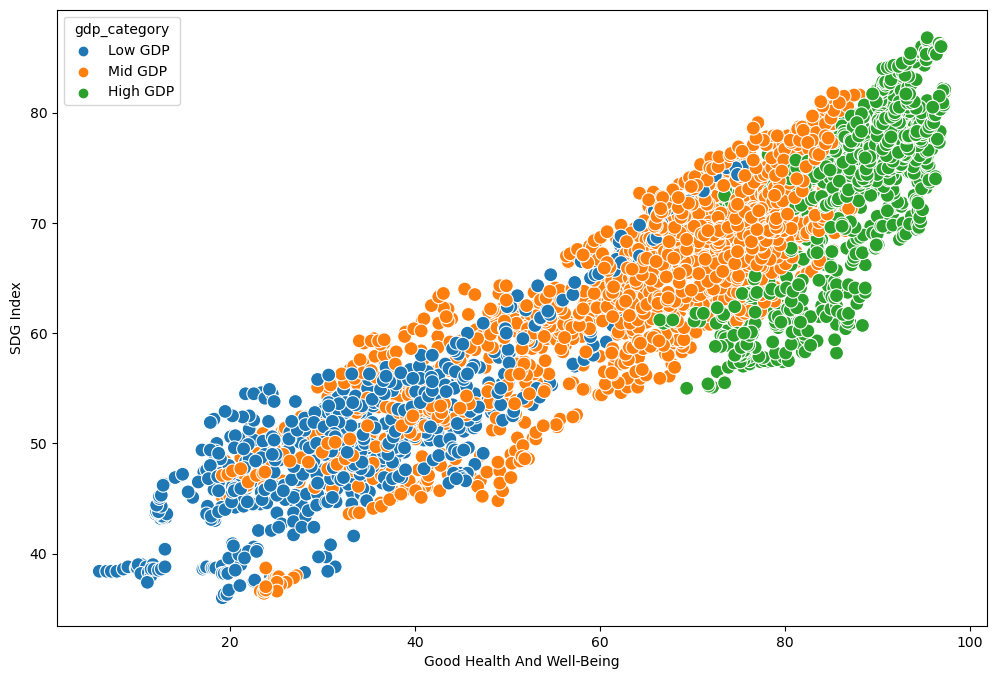

In [64]:
# Plot the GDP categories for the "SDG Index" and "good_health" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=merged_df['good_health'], y=merged_df['sdg_index'], hue=merged_df['gdp_category'], s=100)

ax.grid(False)

plt.xlabel('Good Health And Well-Being') # Label x-axis.
plt.ylabel('SDG Index') # Label y-axis.
plt.show()

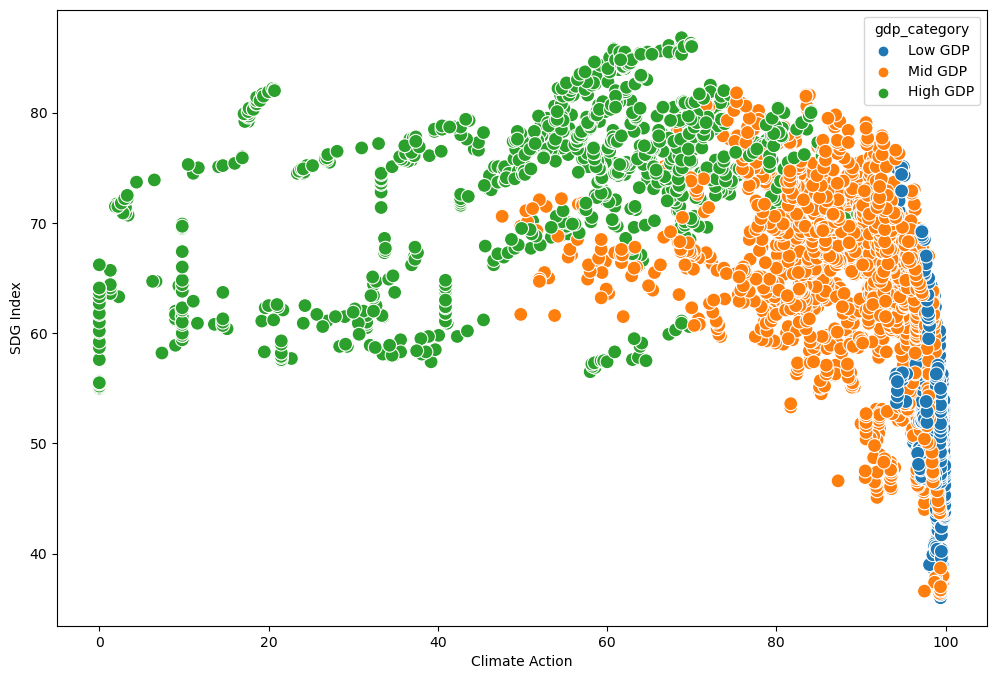

In [65]:
# Plot the GDP categories for the "SDG Index" and "climate_action" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=merged_df['climate_action'], y=merged_df['sdg_index'], hue=merged_df['gdp_category'], s=100)

ax.grid(False)

plt.xlabel('Climate Action') # Label x-axis.
plt.ylabel('SDG Index') # Label y-axis.
plt.show()

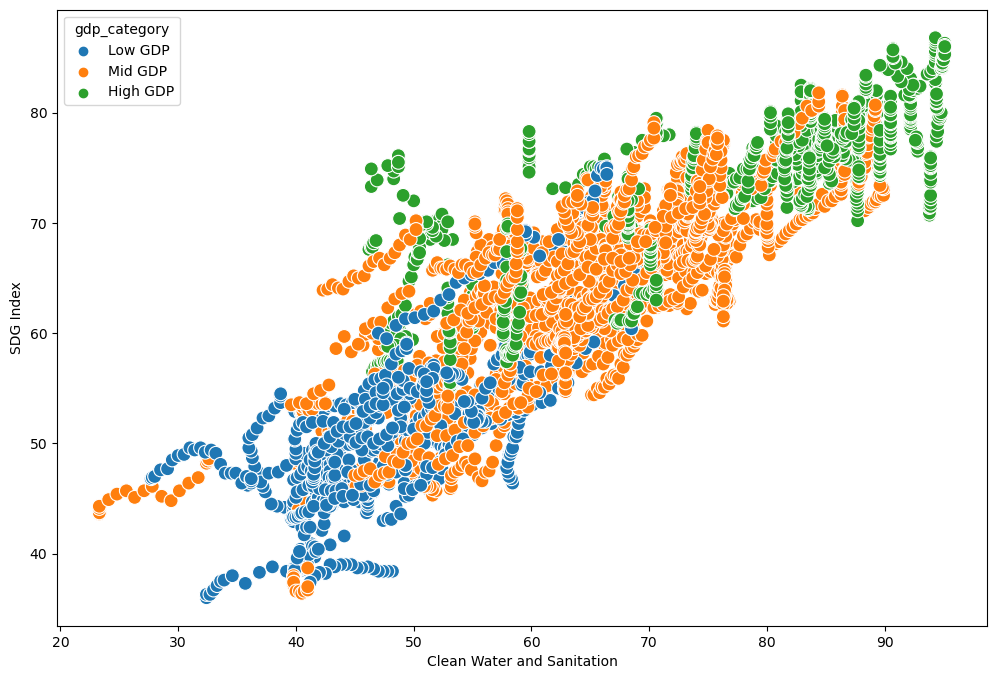

In [66]:
# Plot the GDP categories for the "SDG Index" and "clean_water" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=merged_df['clean_water'], y=merged_df['sdg_index'], hue=merged_df['gdp_category'], s=100)

ax.grid(False)

plt.xlabel('Clean Water and Sanitation') # Label x-axis.
plt.ylabel('SDG Index') # Label y-axis.
plt.show()

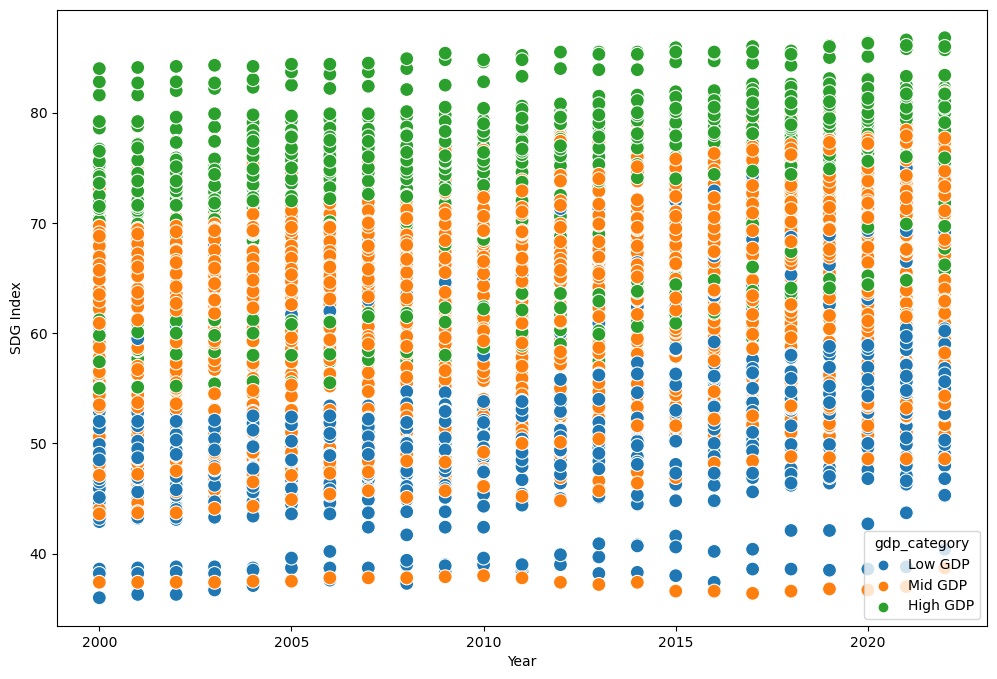

In [67]:
# Plot the GDP categories for the "SDG Index" and "year" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=merged_df['year'], y=merged_df['sdg_index'], hue=merged_df['gdp_category'], s=100)

ax.grid(False)

plt.xlabel('Year') # Label x-axis.
plt.ylabel('SDG Index') # Label y-axis.
plt.show()

#### Comparing the GDP categories and the clusters show that while there is a certain logic to clusters based on GDP, it is not as straightfoward, there is more variance to it. 

**Next Steps**

I'd like to do more geospacial analysis using clusters to get more insights why GDP categories and clusters differ

### Merging merged_df and df_1
For plotting maps on Tableau, We need to have clusters included within the main dataset

In [79]:
merged_df.columns

Index(['country', 'year', 'sdg_index', 'no_poverty', 'zero_hunger',
       'good_health', 'quality_education', 'gender_equality', 'clean_water',
       'affordable_energy', 'economic_growth', 'infrastructure_innovation',
       'reduced_inequalities', 'sustainable_cities', 'responsible_consumption',
       'climate_action', 'underwater_life', 'land_life', 'peace_justice',
       'partnerships', 'gdp', 'gdp_category'],
      dtype='object')

In [82]:
merged_clusters_df = pd.merge(merged_df, df_1, on=['year', 'sdg_index', 'no_poverty', 'zero_hunger',
       'good_health', 'quality_education', 'gender_equality', 'clean_water',
       'affordable_energy', 'economic_growth', 'infrastructure_innovation',
       'reduced_inequalities', 'sustainable_cities', 'responsible_consumption',
       'climate_action', 'underwater_life', 'land_life', 'peace_justice',
       'partnerships'])

In [83]:
merged_clusters_df.head()

,country,year,sdg_index,no_poverty,zero_hunger,good_health,quality_education,gender_equality,clean_water,affordable_energy,economic_growth,infrastructure_innovation,reduced_inequalities,sustainable_cities,responsible_consumption,climate_action,underwater_life,land_life,peace_justice,partnerships,gdp,gdp_category,clusters,cluster
0,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,21.0,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2,449.363154,Low GDP,1,purple
1,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,22.3,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2,449.363154,Low GDP,1,purple
2,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,21.5,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2,183.532775,Low GDP,1,purple
3,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,24.5,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2,200.462376,Low GDP,1,purple
4,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,28.0,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2,221.657662,Low GDP,1,purple


## 6. Exporting Data

In [68]:
# Exporting data

merged_df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'merged_df.csv'))

In [84]:
# Exporting the cluster merged data

merged_clusters_df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'merged_clusters_df.csv'))